# Date Summaries
-  Difference
-  Count by Month/ Year
-  Find Missing Dates & Fill if required
-  Plot Dates wrt date, month, year
  

In [1]:
from datetime import date, datetime, timedelta
from dateutil import parser, relativedelta
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fake = Faker('en_IN')
#set indian profile to create data

In [3]:
for _ in range(10):
    print(fake.name())

Misha Cherian
Prisha Sani
Tiya Chahal
Aarav Sodhi
Drishya Ravi
Anika Raju
Heer Mand
Shayak Doctor
Aradhya Bala
Anika Rana


In [4]:
def generate_random_date(start_date, end_date):
    return fake.date_between_dates(date_start=start_date, date_end=end_date)

In [5]:
num_rows = 1000
columns = ['empcode', 'dept', 'title', 'name', 'gender', 'DOJ', 'DOB'] 
#DOL (Leaving), lastDOP(last Promotion Date)
data = []

In [6]:
for _ in range(num_rows):
    empcode = fake.unique.random_number(digits=4)
    dept = fake.random_element(elements=('HR','IT','Marketing','Engineering'))
    title = fake.random_element(elements=('Mr.', 'Ms.'))
    name = fake.name()
    doj = generate_random_date(datetime(2015, 1, 1), datetime(2020, 1, 1)).strftime('%Y-%m-%d')
    dob = generate_random_date(datetime(1960, 1, 1), datetime(2000, 1, 1)).strftime('%Y-%m-%d')
    gender = fake.random_element(elements=('M', 'F'))
    data.append([empcode, dept, title, name, gender, doj, dob])
df = pd.DataFrame(data, columns=columns)
df.head()

,empcode,dept,title,name,gender,DOJ,DOB
0,6031,HR,Ms.,Faiyaz Sami,M,2017-06-24,1977-10-06
1,5341,HR,Ms.,Devansh Dave,M,2015-03-21,1974-07-30
2,2892,Engineering,Ms.,Raghav Bhatt,M,2017-11-07,1998-01-01
3,4019,Engineering,Ms.,Lakshay Kannan,F,2019-03-08,1989-07-14
4,4895,Engineering,Mr.,Dhanuk Sankaran,F,2018-03-21,1984-02-21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   empcode  1000 non-null   int64 
 1   dept     1000 non-null   object
 2   title    1000 non-null   object
 3   name     1000 non-null   object
 4   gender   1000 non-null   object
 5   DOJ      1000 non-null   object
 6   DOB      1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [9]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOJ'] = pd.to_datetime(df['DOJ'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   empcode  1000 non-null   int64         
 1   dept     1000 non-null   object        
 2   title    1000 non-null   object        
 3   name     1000 non-null   object        
 4   gender   1000 non-null   object        
 5   DOJ      1000 non-null   datetime64[ns]
 6   DOB      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 54.8+ KB


In [10]:
df.head()

,empcode,dept,title,name,gender,DOJ,DOB
0,6031,HR,Ms.,Faiyaz Sami,M,2017-06-24,1977-10-06
1,5341,HR,Ms.,Devansh Dave,M,2015-03-21,1974-07-30
2,2892,Engineering,Ms.,Raghav Bhatt,M,2017-11-07,1998-01-01
3,4019,Engineering,Ms.,Lakshay Kannan,F,2019-03-08,1989-07-14
4,4895,Engineering,Mr.,Dhanuk Sankaran,F,2018-03-21,1984-02-21


In [12]:
from dateutil.relativedelta import relativedelta
# otherwise call error

In [13]:
today = datetime.today()
today

datetime.datetime(2024, 3, 18, 22, 6, 51, 190424)

In [15]:
#age

In [16]:
#function
def ageF(date1):
    today = datetime.today()
    age = relativedelta(today, date1).years
    return age

In [17]:
ageF(today)

0

In [18]:
df['age'] = df['DOB'].apply(ageF)

In [19]:
df.head()

,empcode,dept,title,name,gender,DOJ,DOB,age
0,6031,HR,Ms.,Faiyaz Sami,M,2017-06-24,1977-10-06,46
1,5341,HR,Ms.,Devansh Dave,M,2015-03-21,1974-07-30,49
2,2892,Engineering,Ms.,Raghav Bhatt,M,2017-11-07,1998-01-01,26
3,4019,Engineering,Ms.,Lakshay Kannan,F,2019-03-08,1989-07-14,34
4,4895,Engineering,Mr.,Dhanuk Sankaran,F,2018-03-21,1984-02-21,40


In [20]:
2024-1977

47

In [21]:
#create DOL on random no of days served
today + relativedelta(months=5)

datetime.datetime(2024, 8, 18, 22, 6, 51, 190424)

In [22]:
df['DOJ'].apply(lambda x : x + relativedelta(months=5))

0     2017-11-24
1     2015-08-21
2     2018-04-07
3     2019-08-08
4     2018-08-21
         ...    
995   2015-09-05
996   2020-04-09
997   2015-11-02
998   2016-06-12
999   2015-06-22
Name: DOJ, Length: 1000, dtype: datetime64[ns]

In [26]:
np.random.randint(10,20)

15

In [27]:
df['DOL'] = df['DOJ'].apply(lambda x : x + relativedelta(months=np.random.randint(10,20)))

In [28]:
df.head()

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL
0,6031,HR,Ms.,Faiyaz Sami,M,2017-06-24,1977-10-06,46,2018-07-24
1,5341,HR,Ms.,Devansh Dave,M,2015-03-21,1974-07-30,49,2016-06-21
2,2892,Engineering,Ms.,Raghav Bhatt,M,2017-11-07,1998-01-01,26,2018-09-07
3,4019,Engineering,Ms.,Lakshay Kannan,F,2019-03-08,1989-07-14,34,2020-01-08
4,4895,Engineering,Mr.,Dhanuk Sankaran,F,2018-03-21,1984-02-21,40,2019-05-21


In [ ]:
def tenureF(date1, date2):
    tenure = relativedelta(date2, date1).years
    return tenure

In [29]:
df['tenure'] = np.round((df['DOL']- df['DOJ']).dt.days/30)  #month
df.head()

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure
0,6031,HR,Ms.,Faiyaz Sami,M,2017-06-24,1977-10-06,46,2018-07-24,13.0
1,5341,HR,Ms.,Devansh Dave,M,2015-03-21,1974-07-30,49,2016-06-21,15.0
2,2892,Engineering,Ms.,Raghav Bhatt,M,2017-11-07,1998-01-01,26,2018-09-07,10.0
3,4019,Engineering,Ms.,Lakshay Kannan,F,2019-03-08,1989-07-14,34,2020-01-08,10.0
4,4895,Engineering,Mr.,Dhanuk Sankaran,F,2018-03-21,1984-02-21,40,2019-05-21,14.0


In [ ]:
# served between (day interval)

In [30]:
df.describe(include='all')

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure
count,1000.000000,1000,1000,1000,1000,1000,1000,1000.000000,1000,1000.000000
unique,NaN,4,2,994,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Marketing,Mr.,Divit Agarwal,F,NaN,NaN,NaN,NaN,NaN
freq,NaN,276,507,2,507,NaN,NaN,NaN,NaN,NaN
mean,5065.480000,NaN,NaN,NaN,NaN,2017-07-13 23:15:21.600000,1979-05-11 00:04:19.200000,44.356000,2018-09-26 21:51:50.400000,14.450000
min,2.000000,NaN,NaN,NaN,NaN,2015-01-03 00:00:00,1960-01-10 00:00:00,24.000000,2015-11-03 00:00:00,10.000000
25%,2763.750000,NaN,NaN,NaN,NaN,2016-05-04 00:00:00,1969-02-22 18:00:00,34.000000,2017-07-18 00:00:00,12.000000
50%,5038.500000,NaN,NaN,NaN,NaN,2017-07-19 00:00:00,1978-11-07 00:00:00,45.000000,2018-10-18 00:00:00,14.000000
75%,7386.500000,NaN,NaN,NaN,NaN,2018-09-22 06:00:00,1989-05-06 00:00:00,55.000000,2019-11-30 00:00:00,17.000000
max,9963.000000,NaN,NaN,NaN,NaN,2019-12-31 00:00:00,1999-12-19 00:00:00,64.000000,2021-07-23 00:00:00,19.000000


In [32]:
df.loc[df['DOJ'].between('2015-5-1', '2016-3-31')]

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure
6,2874,IT,Ms.,Tejas Ratta,M,2015-05-19,1985-12-05,38,2016-11-19,18.0
8,4675,HR,Ms.,Anahita Lad,F,2016-01-23,1979-05-08,44,2017-04-23,15.0
9,3848,HR,Mr.,Pari Suri,M,2015-11-06,1977-12-16,46,2016-12-06,13.0
21,5278,Engineering,Mr.,Kanav Ratta,F,2015-07-24,1963-08-10,60,2017-02-24,19.0
23,6686,Engineering,Ms.,Shamik Bakshi,F,2015-10-02,1961-09-30,62,2016-09-02,11.0
...,...,...,...,...,...,...,...,...,...,...
987,5245,Engineering,Ms.,Zara Toor,M,2015-08-03,1965-09-08,58,2016-09-03,13.0
993,8281,IT,Ms.,Adah Tak,F,2016-03-27,1970-11-17,53,2017-05-27,14.0
994,3531,Engineering,Ms.,Farhan Bala,M,2016-02-08,1976-08-11,47,2017-02-08,12.0
997,9178,IT,Mr.,Saksham Tiwari,F,2015-06-02,1960-10-29,63,2016-10-02,16.0


In [33]:
#another way
df.loc[df['DOJ'].isin(pd.date_range('2015-1-1', '2016-3-31'))]

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure
1,5341,HR,Ms.,Devansh Dave,M,2015-03-21,1974-07-30,49,2016-06-21,15.0
6,2874,IT,Ms.,Tejas Ratta,M,2015-05-19,1985-12-05,38,2016-11-19,18.0
8,4675,HR,Ms.,Anahita Lad,F,2016-01-23,1979-05-08,44,2017-04-23,15.0
9,3848,HR,Mr.,Pari Suri,M,2015-11-06,1977-12-16,46,2016-12-06,13.0
15,3703,IT,Mr.,Farhan Kapadia,M,2015-01-03,1965-10-26,58,2015-11-03,10.0
...,...,...,...,...,...,...,...,...,...,...
994,3531,Engineering,Ms.,Farhan Bala,M,2016-02-08,1976-08-11,47,2017-02-08,12.0
995,7100,HR,Mr.,Myra Chaudry,F,2015-04-05,1969-04-12,54,2016-06-05,14.0
997,9178,IT,Mr.,Saksham Tiwari,F,2015-06-02,1960-10-29,63,2016-10-02,16.0
998,6967,IT,Ms.,Akarsh Madan,M,2016-01-12,1974-01-09,50,2017-03-12,14.0


In [37]:
df.DOJ.dt.month

0       6
1       3
2      11
3       3
4       3
       ..
995     4
996    11
997     6
998     1
999     1
Name: DOJ, Length: 1000, dtype: int32

In [38]:
# count employees joined in each year
df.groupby(df.DOJ.dt.year)['DOJ'].agg({'count'})

,count
DOJ,
2015,185
2016,197
2017,213
2018,212
2019,193


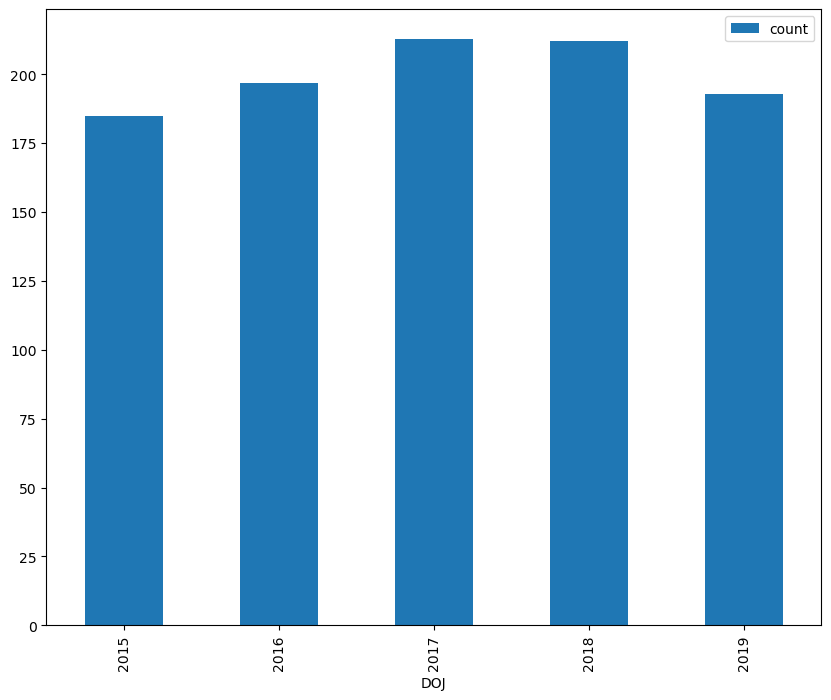

In [39]:
df.groupby(df.DOJ.dt.year)['DOJ'].agg({'count'}).plot(kind='bar', figsize= (10,8))
plt.show()

In [40]:
# year of birth
df.groupby(df.DOB.dt.year)['DOB'].agg({'count'})

,count
DOB,
1960,29
1961,27
1962,27
1963,26
1964,31
1965,28
1966,21
1967,30
1968,25


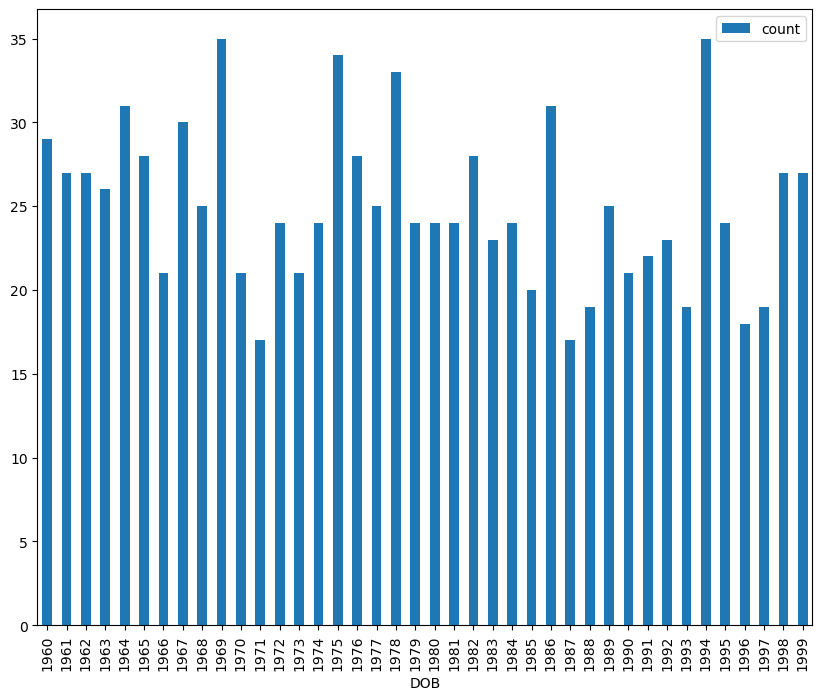

In [41]:
df.groupby(df.DOB.dt.year)['DOB'].agg({'count'}).plot(kind='bar', figsize= (10,8))
plt.show()

In [ ]:
# time series plot

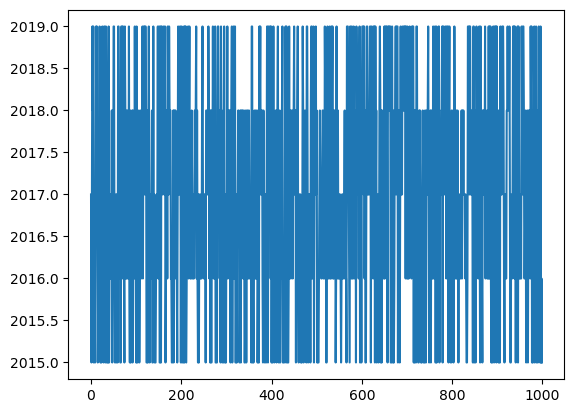

In [42]:
plt.plot(df.DOJ.dt.year)
plt.show()

In [44]:
df.groupby([df.DOJ.dt.year, df.DOJ.dt.month]).agg(count=('empcode','count')).head(15)

count
DOJ  DOJ       
2015 1       17
     2       10
     3       22
     4       11
     5       18
     6       18
     7       12
     8        9
     9       17
     10      15
     11      16
     12      20
2016 1       15
     2       12
     3       19

#df['DOJ'].resample('M')

In [45]:
df['yearDOJ'] = df.DOJ.dt.year
df['monthDOJ'] = df.DOJ.dt.month
df.head()
#df.groupby([yearDOJ, monthDOJ]).agg(count=('empcode','count'))

,empcode,dept,title,name,gender,DOJ,DOB,age,DOL,tenure,yearDOJ,monthDOJ
0,6031,HR,Ms.,Faiyaz Sami,M,2017-06-24,1977-10-06,46,2018-07-24,13.0,2017,6
1,5341,HR,Ms.,Devansh Dave,M,2015-03-21,1974-07-30,49,2016-06-21,15.0,2015,3
2,2892,Engineering,Ms.,Raghav Bhatt,M,2017-11-07,1998-01-01,26,2018-09-07,10.0,2017,11
3,4019,Engineering,Ms.,Lakshay Kannan,F,2019-03-08,1989-07-14,34,2020-01-08,10.0,2019,3
4,4895,Engineering,Mr.,Dhanuk Sankaran,F,2018-03-21,1984-02-21,40,2019-05-21,14.0,2018,3


In [46]:
countDOJ = df.groupby(['yearDOJ', 'monthDOJ']).agg(count=('empcode','count')).reset_index()
countDOJ.head()

,yearDOJ,monthDOJ,count
0,2015,1,17
1,2015,2,10
2,2015,3,22
3,2015,4,11
4,2015,5,18


In [47]:
# convert to 2D
countDOJ2D = countDOJ.pivot(index='yearDOJ', columns='monthDOJ', values='count')
countDOJ2D

monthDOJ,1,2,3,4,5,6,7,8,9,10,11,12
yearDOJ,,,,,,,,,,,,
2015,17,10,22,11,18,18,12,9,17,15,16,20
2016,15,12,19,17,13,17,24,18,11,17,15,19
2017,21,21,14,17,14,20,20,19,11,13,16,27
2018,12,16,32,14,16,16,18,20,19,18,19,12
2019,16,11,20,12,15,13,16,26,20,16,13,15


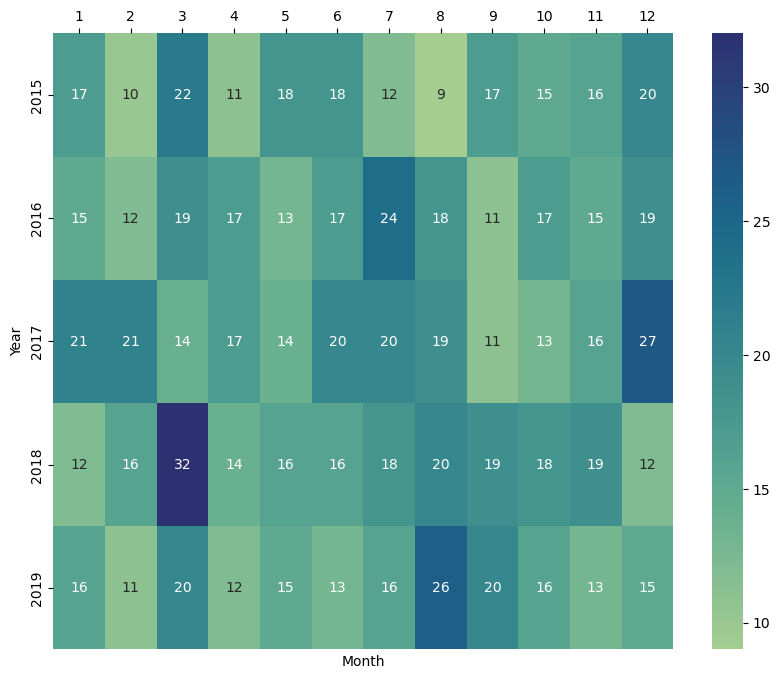

In [48]:
plt.figure(figsize=(10,8))
ax= sns.heatmap(countDOJ2D, annot=True, cmap='crest')
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.xaxis.tick_top()
plt.show()